In [21]:
import numpy as np
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
def samples(x, pdf, N, plot=False):
    randomNumbers = np.random.random(N)
    cdf = cumtrapz(pdf, x)[:, None]
    print('maximum of cdf should be 1, the value is: ', np.max(cdf))
    difference = np.abs(cdf - randomNumbers)
    indices = np.where(difference == np.min(difference, axis=0))
    distSamples = 0.5*(x[indices[0]] + x[indices[0]+1])
    return distSamples

In [113]:
nsamples = 1000
pdfInterpGrid = 1000
nbins=20

In [119]:
#replace with x values of DM pdf
x = np.array([22, 23, 24, 25, 26, 27, 28, 29, 30.], dtype=np.float)
#replace with y values of DM pdf
pdf = np.array([0.0, 0.1, 0.25, 0.75, 1.0, 0.75, 0.25, 0.1, 0.0], dtype=np.float)
area = cumtrapz(pdf, x)[-1]
pdf /= area
f = interp1d(x, pdf, fill_value=(np.array(0.0),np.array(0.0)), bounds_error=False)

In [123]:
xx = np.linspace(20, 32, pdfInterpGrid)
samp = samples(xx, f(xx), nsamples)

maximum of cdf should be 1, the value is:  0.99999661824


(array([ 0.01113712,  0.03619565,  0.04176421,  0.06682274,  0.04733278,
         0.15313545,  0.15870401,  0.23944816,  0.31462375,  0.28399666,
         0.31740803,  0.25615385,  0.27564381,  0.19489967,  0.14199833,
         0.08631271,  0.06125418,  0.03897993,  0.02784281,  0.03062709]),
 array([ 22.37237237,  22.73153153,  23.09069069,  23.44984985,
         23.80900901,  24.16816817,  24.52732733,  24.88648649,
         25.24564565,  25.6048048 ,  25.96396396,  26.32312312,
         26.68228228,  27.04144144,  27.4006006 ,  27.75975976,
         28.11891892,  28.47807808,  28.83723724,  29.1963964 ,  29.55555556]),
 <a list of 1 Patch objects>)

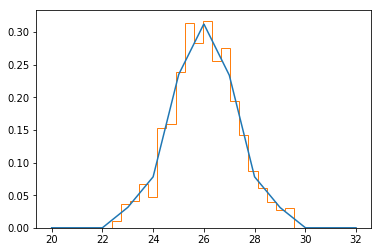

In [124]:
plt.plot(xx, f(xx))
plt.hist(samp, density=True, histtype='step', bins=nbins)

In [136]:
#think about a way to loop through this and output into a file >> out.txt
#calling sequence
#ymw16 Gal l b dm 1 > out.txt 
%system ./ymw16/ymw16 Gal 0 90 3. 1 
%system ./ymw16/ymw16 Gal 0 90 2. 1 


['Gal: gl=   0.000 gb=  90.000 DM=    2.00 DM_Gal:    2.00 Dist:    196.7 log(tau_sc): -9.722 ']